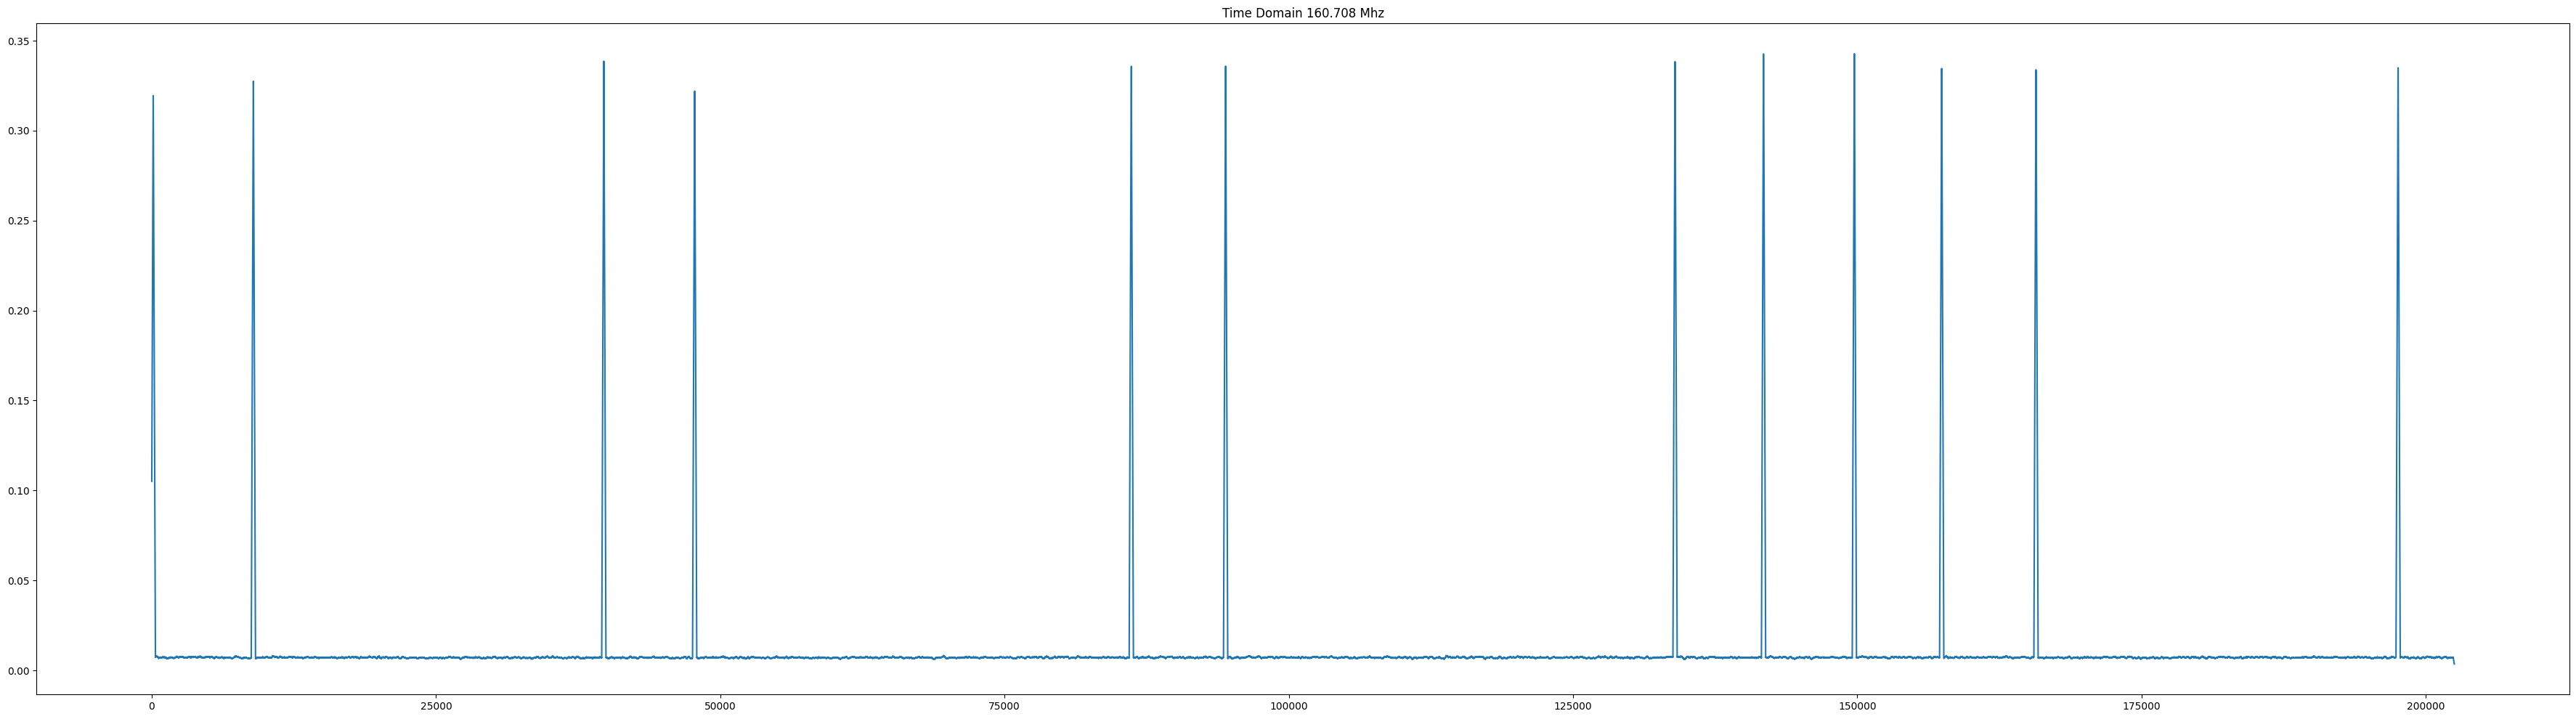

In [11]:
from scipy.io import wavfile
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt

samples = np.fromfile('../data/rtl_ct.s8', np.uint8)
samples = samples[90_000_000:130_500_000]
sample_rate = 1024000
center_freq = 160270968
size = len(samples)
x = samples

x = x.astype(np.float32)
x = (x - 127) / 128
x = x[::2] + x[1::2]*1j

# FILTER AND PLOT TIME DOMAIN 160.601120Mhz

t = np.arange(len(x))/1024000
h = signal.firwin(501, 0.02, pass_zero=True)
p = np.exp(2j*np.pi*t*-437072)

z = x

z = z * p
z = signal.convolve(z, h, 'same')
z = z[::100]
z = np.abs(z)
z = signal.convolve(z, [1]*189, 'same')/189

#z_peaks = signal.find_peaks(z, prominence=0.000005)

plt.figure(figsize=(45,12))
#plt.plot(z_peaks[0], z_peaks[1]["prominences"], marker='x', linestyle='', color="r", markersize=20)
plt.plot(z)

plt.title(f"Time Domain 160.708 Mhz")
plt.show()